<a href="https://colab.research.google.com/github/vikasv123/Diamond-Price-Prediction/blob/main/Diamond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Loading Data

In [ ]:
data = sns.load_dataset("diamonds")
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Understanding Data

In [ ]:
data.shape

(53940, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
# details

### price: price in US dollars (\$326--\$18,823)

### carat: weight of the diamond (0.2--5.01)

### cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

### color: diamond colour, from J (worst) to D (best)

### clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

### x: length in mm (0--10.74)

### y: width in mm (0--58.9)

### z: depth in mm (0--31.8)

### depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

### table: width of top of diamond relative to widest point (43--95) 

In [ ]:
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
print(data.columns[1])
print(data["cut"].unique())
print("-"*70)
print(data.columns[2])
print(data["color"].unique())
print("-"*70)
print(data.columns[3])
print(data["clarity"].unique())

cut
['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
----------------------------------------------------------------------
color
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
----------------------------------------------------------------------
clarity
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


In [ ]:
# checking missing values

In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Data Visualization

## 1> Univariate Analysis

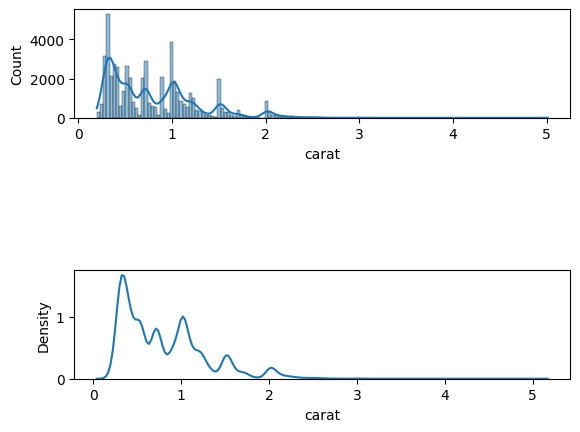

In [ ]:
#carat
plt.subplot(3,1,1)
sns.histplot(data["carat"],kde=True)

plt.subplot(3,1,3)
sns.kdeplot(data["carat"])

plt.show()

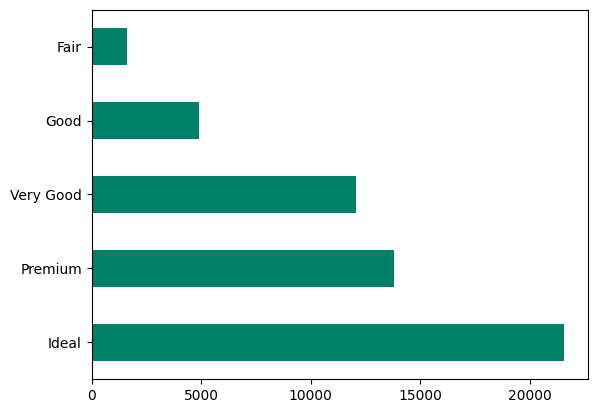

In [ ]:
# cut
data["cut"].value_counts().plot.barh(cmap="summer")
plt.show()

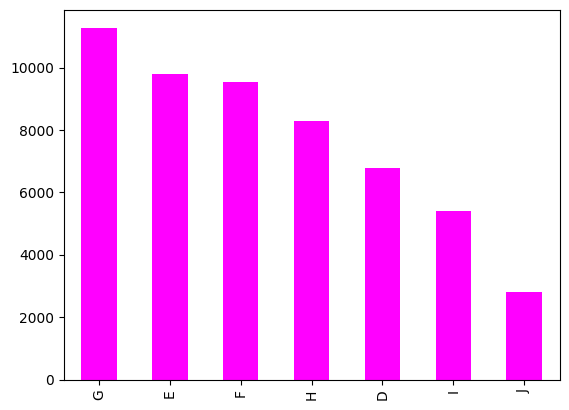

In [ ]:
# color
data["color"].value_counts().plot.bar(cmap="spring")
plt.show()

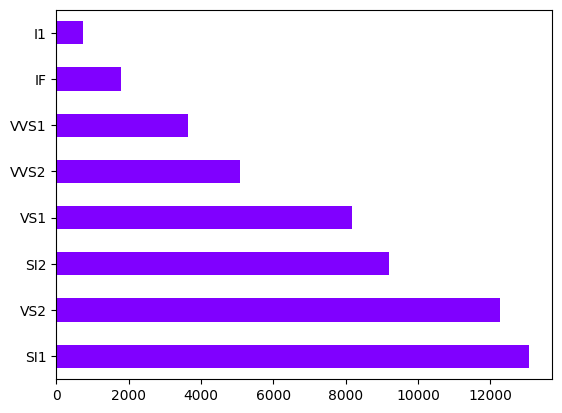

In [ ]:
# clarity
data["clarity"].value_counts().plot.barh(cmap="rainbow")
plt.show()

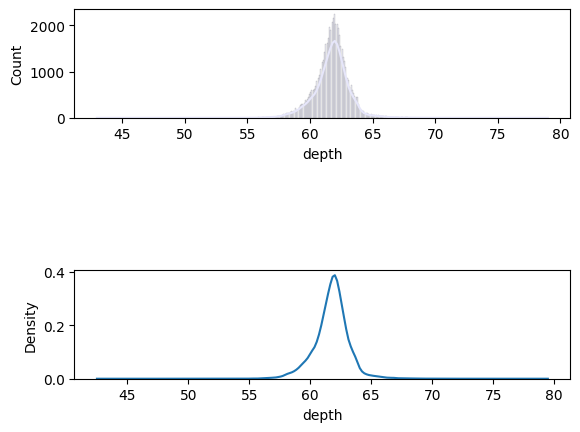

In [ ]:
#depth
plt.subplot(3,1,1)
sns.histplot(data["depth"],kde=True,color="lavender")

plt.subplot(3,1,3)
sns.kdeplot(data["depth"])

plt.show()

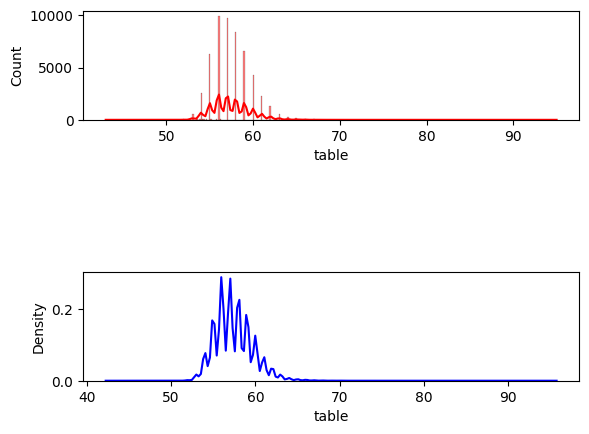

In [ ]:
#table
plt.subplot(3,1,1)
sns.histplot(data["table"],kde=True,color="red")

plt.subplot(3,1,3)
sns.kdeplot(data["table"],color="blue")

plt.show()

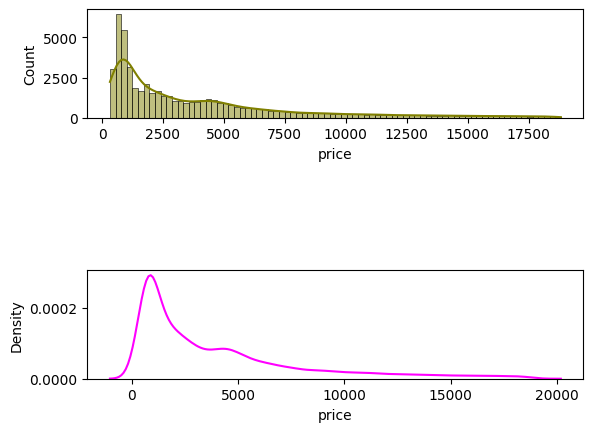

In [ ]:
#price
plt.subplot(3,1,1)
sns.histplot(data["price"],kde=True,color="olive")

plt.subplot(3,1,3)
sns.kdeplot(data["price"],color="magenta")

plt.show()

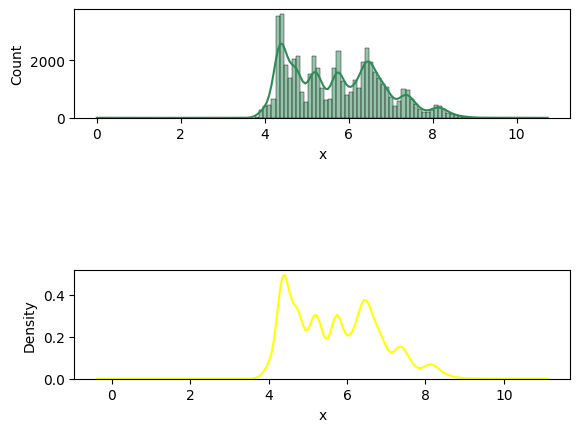

In [ ]:
#x
plt.subplot(3,1,1)
sns.histplot(data["x"],kde=True,color="seagreen")

plt.subplot(3,1,3)
sns.kdeplot(data["x"],color="yellow")

plt.show()

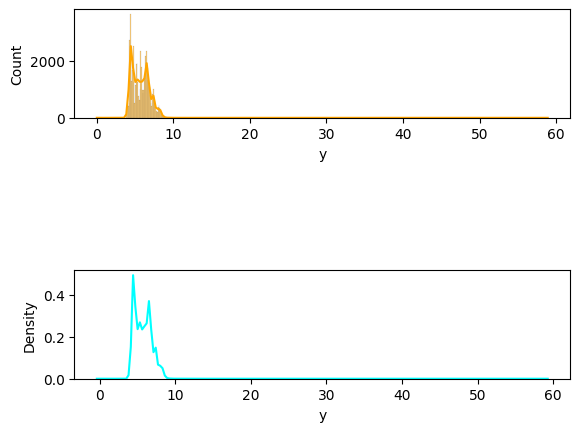

In [ ]:
#y
plt.subplot(3,1,1)
sns.histplot(data["y"],kde=True,color="orange")

plt.subplot(3,1,3)
sns.kdeplot(data["y"],color="cyan")

plt.show()

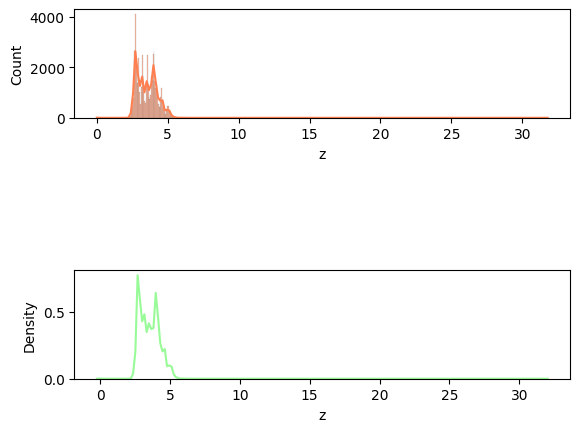

In [ ]:
#z
plt.subplot(3,1,1)
sns.histplot(data["z"],kde=True,color="coral")

plt.subplot(3,1,3)
sns.kdeplot(data["z"],color="palegreen")

plt.show()

# Feature Engineering

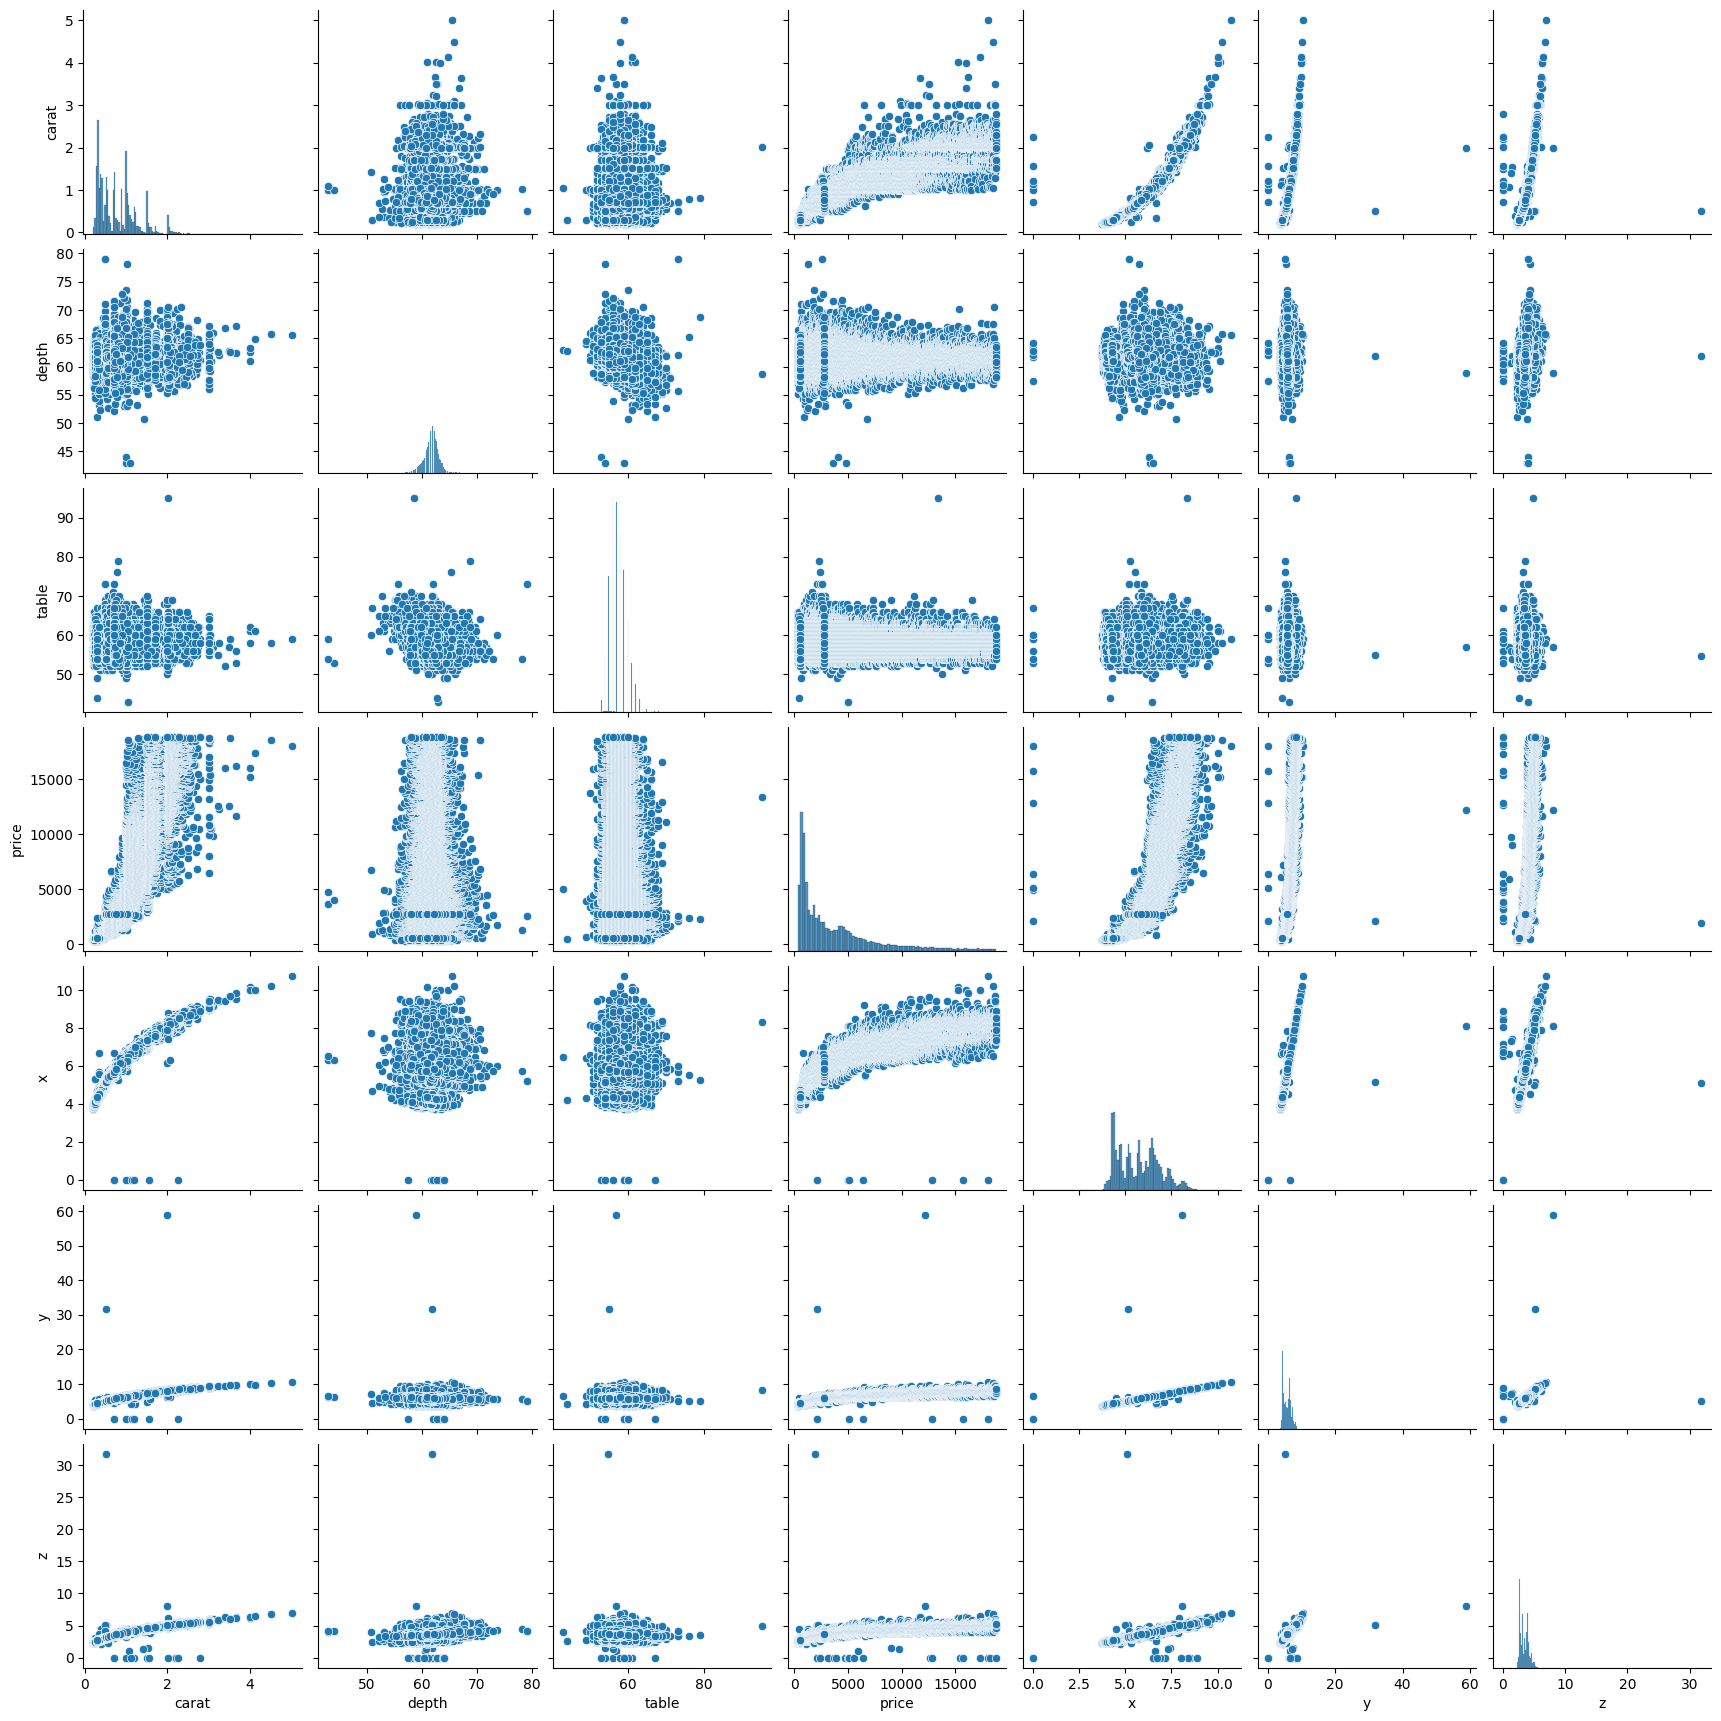

In [ ]:
sns.pairplot(data)

### 1)Filter Method

'''
Filter method is less accurate. It is great while doing EDA, 
it can also be used for checking multi co-linearity in data.


The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation
'''

<ipython-input-23-47eb1dc77d01>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds=data.corr()


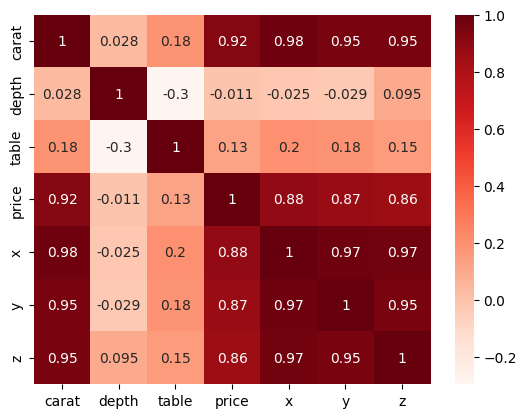

In [ ]:
# Using Pearson Correlation
ds=data.corr()
sns.heatmap(ds,cmap="Reds",annot=True)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(ds["price"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

carat    0.921591
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

In [ ]:
print(data[["carat","x","y","z"]].corr())

          carat         x         y         z
carat  1.000000  0.975094  0.951722  0.953387
x      0.975094  1.000000  0.974701  0.970772
y      0.951722  0.974701  1.000000  0.952006
z      0.953387  0.970772  0.952006  1.000000


 As we know that there are only four columns which corelate with target column 

so we drop other columns from the data set

In [ ]:
print(data)
db=data.drop(["depth","table"],1)
print(db)
db.head()

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]
       carat        cut color clarity  price     

<ipython-input-26-e39bd0af525a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  db=data.drop(["depth","table"],1)


,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


### 2) Wrapper Method & Embedded Method

"""Wrapper and Embedded methods give more accurate results but as they are computationally expensive, these method are suited when you have lesser features (~20).
This is an iterative and computationally expensive process but it is more accurate than the filter method.

There are different wrapper methods such as Backward Elimination, Forward Selection, Bidirectional Elimination and RFE.
"""

# Imputation

threshold = 0.7
Dropping columns with missing value rate higher than threshold

data = data[data.columns[data.isnull().mean() < threshold]]
#Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold] 


In [ ]:
db.isnull().sum()

carat      0
cut        0
color      0
clarity    0
price      0
x          0
y          0
z          0
dtype: int64

# Handling Outliers

visualizing the outliers gives a chance to take a decision with high precision.
Outlier Detection with Standard Deviation

If a value has a distance to the average higher than x * standard deviation, it can be assumed as an outlier. Then what x should be?
There is no trivial solution for x, but usually, a value between 2 and 4 seems practical.


In [ ]:
# Dropping the outlier rows with standard deviation

In [ ]:
print(db.shape)
factor=3
upper_lim=db["carat"].mean()+db["carat"].std()*factor
lower_lim=db["carat"].mean()-db["carat"].std()*factor

db=db[(db["carat"]<upper_lim)& (db["carat"]>lower_lim)]

db.shape

(53940, 8)


(53501, 8)

In [ ]:
upper_lim=db["x"].mean()+db["x"].std()*factor
lower_lim=db["x"].mean()-db["x"].std()*factor

db=db[(db["x"]<upper_lim)& (db["x"]>lower_lim)]
print(db.shape)

(53494, 8)


In [ ]:
upper_lim=db["y"].mean()+db["y"].std()*factor
lower_lim=db["y"].mean()-db["y"].std()*factor

db=db[(db["y"]<upper_lim)& (db["y"]>lower_lim)]
print(db.shape)

(53492, 8)


In [ ]:
upper_lim=db["z"].mean()+db["z"].std()*factor
lower_lim=db["z"].mean()-db["z"].std()*factor

db=db[(db["z"]<upper_lim)& (db["z"]>lower_lim)]
print(db.shape)

(53478, 8)


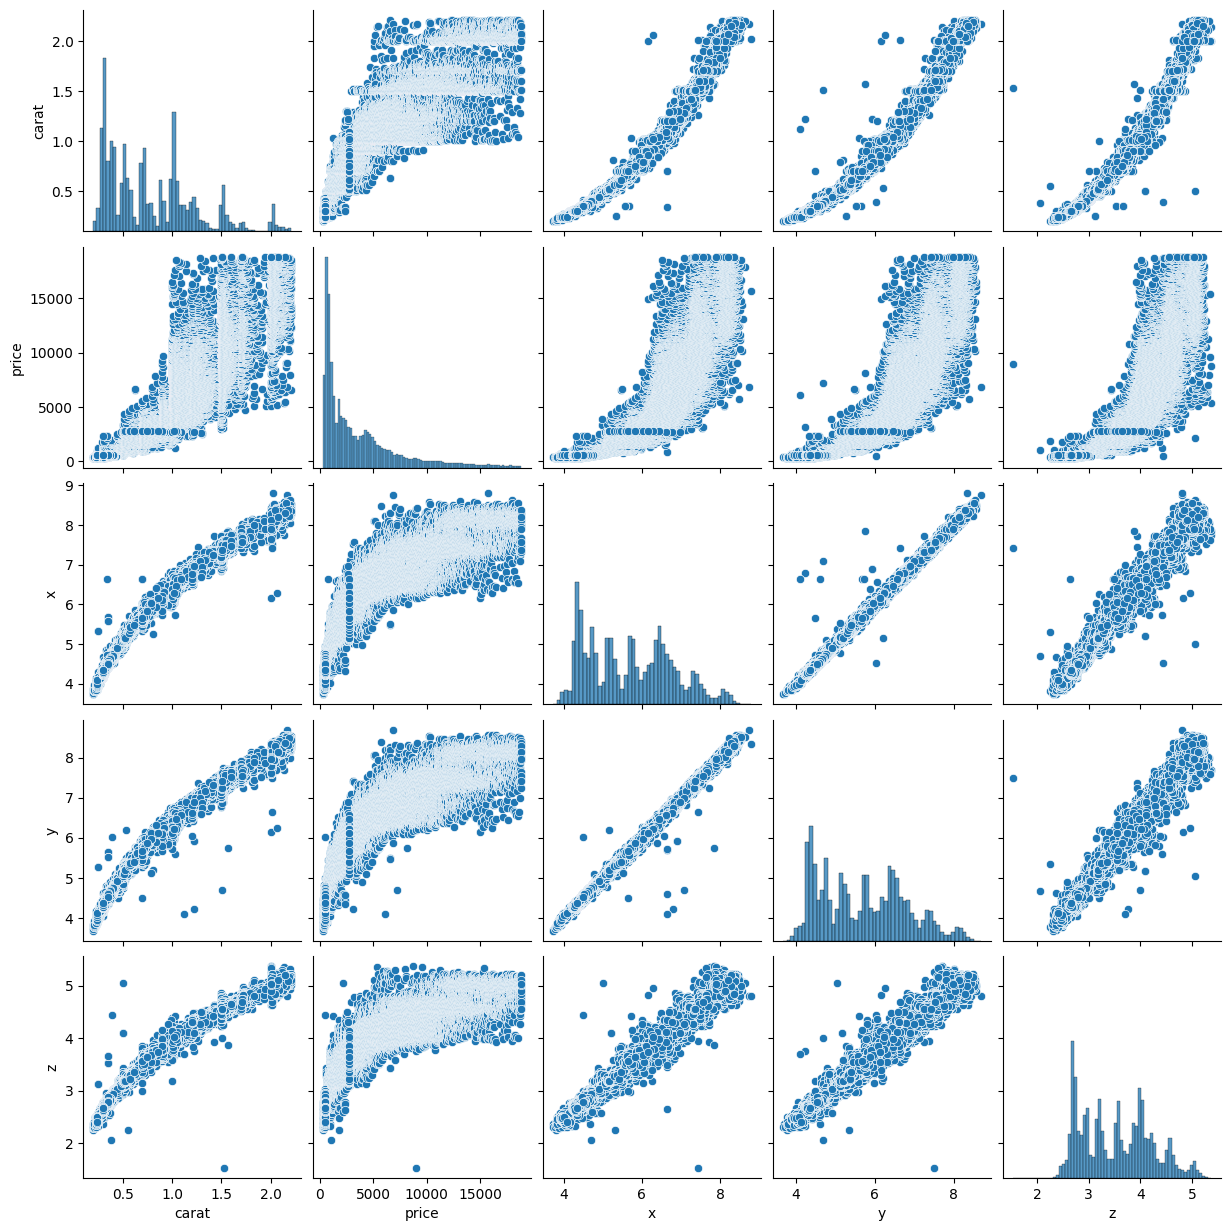

In [ ]:
sns.pairplot(db)

# Encoding

In [ ]:
# Label Encoding
db

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53478 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53478 non-null  float64 
 1   cut      53478 non-null  category
 2   color    53478 non-null  category
 3   clarity  53478 non-null  category
 4   price    53478 non-null  int64   
 5   x        53478 non-null  float64 
 6   y        53478 non-null  float64 
 7   z        53478 non-null  float64 
dtypes: category(3), float64(4), int64(1)
memory usage: 2.6 MB


In [ ]:
db["cut"].value_counts()

Ideal        21433
Premium      13602
Very Good    12011
Good          4868
Fair          1564
Name: cut, dtype: int64

we need our column should be category data type and these are already so now we start label encoding

In [ ]:
db["cut"]=db["cut"].cat.codes

In [ ]:
db["cut"].value_counts()

0    21433
1    13602
2    12011
3     4868
4     1564
Name: cut, dtype: int64

In [ ]:
db["color"].value_counts()

G    11245
E     9787
F     9526
H     8192
D     6768
I     5293
J     2667
Name: color, dtype: int64

In [ ]:
db["color"]=db["color"].cat.codes

In [ ]:
db["color"].value_counts()

3    11245
1     9787
2     9526
4     8192
0     6768
5     5293
6     2667
Name: color, dtype: int64

In [ ]:
db["clarity"].value_counts()

SI1     12993
VS2     12209
SI2      8939
VS1      8146
VVS2     5066
VVS1     3653
IF       1788
I1        684
Name: clarity, dtype: int64

In [ ]:
db["clarity"]=db["clarity"].cat.codes

In [ ]:
db["clarity"].value_counts()

5    12993
4    12209
6     8939
3     8146
2     5066
1     3653
0     1788
7      684
Name: clarity, dtype: int64

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53478 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53478 non-null  float64
 1   cut      53478 non-null  int8   
 2   color    53478 non-null  int8   
 3   clarity  53478 non-null  int8   
 4   price    53478 non-null  int64  
 5   x        53478 non-null  float64
 6   y        53478 non-null  float64
 7   z        53478 non-null  float64
dtypes: float64(4), int64(1), int8(3)
memory usage: 2.6 MB


In [ ]:
db

,carat,cut,color,clarity,price,x,y,z
0,0.23,0,1,6,326,3.95,3.98,2.43
1,0.21,1,1,5,326,3.89,3.84,2.31
2,0.23,3,1,3,327,4.05,4.07,2.31
3,0.29,1,5,4,334,4.20,4.23,2.63
4,0.31,3,6,6,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,0,0,5,2757,5.75,5.76,3.50
53936,0.72,3,0,5,2757,5.69,5.75,3.61
53937,0.70,2,0,5,2757,5.66,5.68,3.56
53938,0.86,1,4,6,2757,6.15,6.12,3.74


In [ ]:
dset=db.values

In [ ]:
dset=dset[:,[0,1,2,3,5,6,7,4]]

In [ ]:
dset=pd.DataFrame(dset,columns=["carat","cut","color","clarity","x","y","z","price"])
dset

,carat,cut,color,clarity,x,y,z,price
0,0.23,0.0,1.0,6.0,3.95,3.98,2.43,326.0
1,0.21,1.0,1.0,5.0,3.89,3.84,2.31,326.0
2,0.23,3.0,1.0,3.0,4.05,4.07,2.31,327.0
3,0.29,1.0,5.0,4.0,4.20,4.23,2.63,334.0
4,0.31,3.0,6.0,6.0,4.34,4.35,2.75,335.0
...,...,...,...,...,...,...,...,...
53473,0.72,0.0,0.0,5.0,5.75,5.76,3.50,2757.0
53474,0.72,3.0,0.0,5.0,5.69,5.75,3.61,2757.0
53475,0.70,2.0,0.0,5.0,5.66,5.68,3.56,2757.0
53476,0.86,1.0,4.0,6.0,6.15,6.12,3.74,2757.0


In [ ]:
# #download this daimond dataset
# dset.to_csv("clear_Diamond.csv")

# Data Normalization

In [ ]:
from sklearn import preprocessing

In [ ]:
X=db.drop("price",1).values
Y=db["price"].values
print(X)

normlized_X=preprocessing.normalize(X)
X

[[0.23 0.   1.   ... 3.95 3.98 2.43]
 [0.21 1.   1.   ... 3.89 3.84 2.31]
 [0.23 3.   1.   ... 4.05 4.07 2.31]
 ...
 [0.7  2.   0.   ... 5.66 5.68 3.56]
 [0.86 1.   4.   ... 6.15 6.12 3.74]
 [0.75 0.   0.   ... 5.83 5.87 3.64]]


<ipython-input-52-b231957d6187>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=db.drop("price",1).values


array([[0.23, 0.  , 1.  , ..., 3.95, 3.98, 2.43],
       [0.21, 1.  , 1.  , ..., 3.89, 3.84, 2.31],
       [0.23, 3.  , 1.  , ..., 4.05, 4.07, 2.31],
       ...,
       [0.7 , 2.  , 0.  , ..., 5.66, 5.68, 3.56],
       [0.86, 1.  , 4.  , ..., 6.15, 6.12, 3.74],
       [0.75, 0.  , 0.  , ..., 5.83, 5.87, 3.64]])

In [ ]:
# MinMaxScaler for normalization

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
scaled=scaler.fit_transform(X)
scaled

array([[0.01492537, 0.        , 0.16666667, ..., 0.0433925 , 0.05988024,
        0.234375  ],
       [0.00497512, 0.25      , 0.16666667, ..., 0.03155819, 0.03193613,
        0.203125  ],
       [0.01492537, 0.75      , 0.16666667, ..., 0.06311637, 0.07784431,
        0.203125  ],
       ...,
       [0.24875622, 0.5       , 0.        , ..., 0.38067061, 0.3992016 ,
        0.52864583],
       [0.32835821, 0.25      , 0.66666667, ..., 0.47731755, 0.48702595,
        0.57552083],
       [0.27363184, 0.        , 0.        , ..., 0.41420118, 0.43712575,
        0.54947917]])

In [ ]:
# StandardScaler for standardization

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaled=scaler.fit_transform(X)
scaled

array([[-1.23099202, -0.98053316, -0.93113761, ..., -1.6093786 ,
        -1.59475701, -1.62332089],
       [-1.27542741, -0.08392978, -0.93113761, ..., -1.66431065,
        -1.72381029, -1.80125754],
       [-1.23099202,  1.709277  , -0.93113761, ..., -1.51782519,
        -1.51179419, -1.80125754],
       ...,
       [-0.18676027,  0.81267361, -1.52161296, ..., -0.04381529,
        -0.02768151,  0.05224922],
       [ 0.16872288, -0.08392978,  0.84028845, ...,  0.40479642,
         0.3779145 ,  0.31915419],
       [-0.07567179, -0.98053316, -1.52161296, ...,  0.11182551,
         0.14746222,  0.17087365]])

# Convert  Dataset into Array and split the data

In [ ]:
x=db.drop("price",1).values
y=db["price"].values

<ipython-input-59-18fb859ac08d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=db.drop("price",1).values


In [ ]:
# import sklearn
# from sklearn import model_selection
# from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,shuffle=False,random_state=42)
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (42782, 7)
y_train :  (42782,)
x_test :  (10696, 7)
y_test :  (10696,)


# Choosing an appropriate Model

### Mean Absolute Error (MAE)
The MAE is the sum of all the error magnitudes divided by the number of points, so essentially the average error.

Therefore, the lower the MAE, the less error in your model.

### R-Squares
The higher the R-squared, the better the model fits your data.

## LinearRegression

In [ ]:
# from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# from sklearn import metrics
# from sklearn.metrics import r2_score


In [ ]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction1=model1.predict(x_test)

prediction1

array([1278.63178387, 1672.97215606, 1064.15089752, ..., 3036.01479972,
       2581.90913546, 3279.3856794 ])

In [ ]:
print('Train Score: ',model1.score(x_train,y_train))
print('Test Score: ',model1.score(x_test,y_test))

Train Score:  0.915174820814211
Test Score:  -0.288223882494395


In [ ]:
score1=r2_score(y_test,prediction1)
print("r2_score of LinearRegression model is: ",score1 ,"%")
m1=mean_absolute_error(y_test,prediction1)
m1

r2_score of LinearRegression model is:  -0.288223882494395 %


514.4338000985125

## Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model2=GradientBoostingRegressor()
model2.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
prediction2=model2.predict(x_test)

prediction2

array([ 965.51807107, 1464.90288075, 1077.61221962, ..., 3144.95539299,
       2938.06387431, 2943.24416049])

In [ ]:
print('Train Score: ',model2.score(x_train,y_train))
print('Test Score: ',model2.score(x_test,y_test))

Train Score:  0.9771945036973689
Test Score:  0.5193712158217516


In [ ]:
score2=r2_score(y_test,prediction2)
print("r2_score of Gradient Boosting Regression model is: ",score2 ,"%")
m2=mean_absolute_error(y_test,prediction2)
m2

r2_score of Gradient Boosting Regression model is:  0.5193712158217516 %


332.66093001815847

## Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
model3=SVR()
model3.fit(x_train,y_train)

SVR()

In [ ]:
prediction3=model3.predict(x_test)

prediction3

array([1386.30727677, 2024.92594462, 1580.24583021, ..., 2951.25299354,
       3748.44972355, 3175.47055078])

In [ ]:
print('Train Score: ',model3.score(x_train,y_train))
print('Test Score: ',model3.score(x_test,y_test))

Train Score:  0.5985618767426084
Test Score:  -0.0990378763927553


In [ ]:
score3=r2_score(y_test,prediction3)
print("r2_score of Support Vector Regression model is: ",score3 ,"%")
m3=mean_absolute_error(y_test,prediction3)
m3

r2_score of Support Vector Regression model is:  -0.0990378763927553 %


504.9973572497507

## Bayesian Ridge Regression


In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
model4=BayesianRidge()
model4.fit(x_train,y_train)

BayesianRidge()

In [ ]:
prediction4=model4.predict(x_test)

prediction4

array([1278.4612012 , 1673.17238325, 1064.15649798, ..., 3036.18088281,
       2582.1917343 , 3279.52055673])

In [ ]:
print('Train Score: ',model4.score(x_train,y_train))
print('Test Score: ',model4.score(x_test,y_test))

Train Score:  0.9151748173660395
Test Score:  -0.2884089506603569


In [ ]:
score4=r2_score(y_test,prediction4)
print("r2_score of Bayesian Ridge Regression model is: ",score4 ,"%")
m4=mean_absolute_error(y_test,prediction4)
m4

r2_score of Bayesian Ridge Regression model is:  -0.2884089506603569 %


514.4807066040494

## Stochastic Gradient Descent Regression

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model5=SGDRegressor()
model5.fit(x_train,y_train)

SGDRegressor()

In [ ]:
prediction5=model5.predict(x_test)

prediction5

array([1287.58704713, 1794.71088248, 1130.83078847, ..., 3163.31429384,
       2787.25617428, 3410.19361475])

In [ ]:
print('Train Score: ',model5.score(x_train,y_train))
print('Test Score: ',model5.score(x_test,y_test))

Train Score:  0.9141885095710773
Test Score:  -0.5065560545743497


In [ ]:
score5=r2_score(y_test,prediction5)
print("r2_score of Stochastic Gradient Descent Regression model is: ",score5 ,"%")
m5=mean_absolute_error(y_test,prediction5)
m5

r2_score of Stochastic Gradient Descent Regression model is:  -0.5065560545743497 %


569.3510922562012

## Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model6=ElasticNet()
model6.fit(x_train,y_train)

ElasticNet()

In [ ]:
prediction6=model6.predict(x_test)

prediction6

array([1301.0879666 , 2488.4409219 , 1700.49741173, ..., 3859.71771504,
       4292.14542227, 4157.54327365])

In [ ]:
print('Train Score: ',model6.score(x_train,y_train))
print('Test Score: ',model6.score(x_test,y_test))

Train Score:  0.8304003583384325
Test Score:  -3.931186921033766


In [ ]:
score6=r2_score(y_test,prediction6)
print("r2_score of Elastic Net Regression model is: ",score6 ,"%")
m6=mean_absolute_error(y_test,prediction6)
m6

r2_score of Elastic Net Regression model is:  -3.931186921033766 %


1219.10405643614

## Decision tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model7=DecisionTreeRegressor()
model7.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
prediction7=model7.predict(x_test)

prediction7

array([ 735., 1344., 1103., ..., 2964., 2815., 2810.])

In [ ]:
print('Train Score: ',model7.score(x_train,y_train))
print('Test Score: ',model7.score(x_test,y_test))

Train Score:  0.9999847228336035
Test Score:  0.05628984499593148


In [ ]:
score7=r2_score(y_test,prediction7)
print("r2_score of Decision Tree Regression model is: ",score7 ,"%")
m7=mean_absolute_error(y_test,prediction7)
m7

r2_score of Decision Tree Regression model is:  0.05628984499593148 %


471.79824233358266

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model8=RandomForestRegressor()
model8.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
prediction8=model8.predict(x_test)

prediction8

array([ 753.37      , 1346.17      , 1187.79      , ..., 2851.71      ,
       2967.15      , 2925.12166667])

In [ ]:
print('Train Score: ',model8.score(x_train,y_train))
print('Test Score: ',model8.score(x_test,y_test))

Train Score:  0.9973631662724044
Test Score:  0.2997626823443824


In [ ]:
score8=r2_score(y_test,prediction8)
print("r2_score of Random Forest Regression model is: ",score8 ,"%")
m8=mean_absolute_error(y_test,prediction8)
m8

r2_score of Random Forest Regression model is:  0.2997626823443824 %


409.68584302654307

## K-nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model9=KNeighborsRegressor()
model9.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
prediction9=model9.predict(x_test)

prediction9

array([ 750. , 1299.6, 1303.4, ..., 2866.4, 3322. , 2852. ])

In [ ]:
print('Train Score: ',model9.score(x_train,y_train))
print('Test Score: ',model9.score(x_test,y_test))

Train Score:  0.9847139891711237
Test Score:  0.0012491422283309461


In [ ]:
score9=r2_score(y_test,prediction9)
print("r2_score of K Neighbors Regression model is: ",score9 ,"%")
m9=mean_absolute_error(y_test,prediction9)
m9

r2_score of K Neighbors Regression model is:  0.0012491422283309461 %


486.58556469708293

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model10=Lasso()
model10.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.904e+09, tolerance: 7.426e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
prediction10=model10.predict(x_test)

prediction10

array([1232.99466735, 1720.28965668, 1055.52862025, ..., 3043.5023976 ,
       2613.73432663, 3268.55112093])

In [ ]:
print('Train Score: ',model10.score(x_train,y_train))
print('Test Score: ',model10.score(x_test,y_test))

Train Score:  0.9150557421444786
Test Score:  -0.2942673110968421


In [ ]:
score10=r2_score(y_test,prediction10)
print("r2_score of Lasso Regression model is: ",score10 ,"%")
m10=mean_absolute_error(y_test,prediction10)
m10

r2_score of Lasso Regression model is:  -0.2942673110968421 %


516.2512881211592

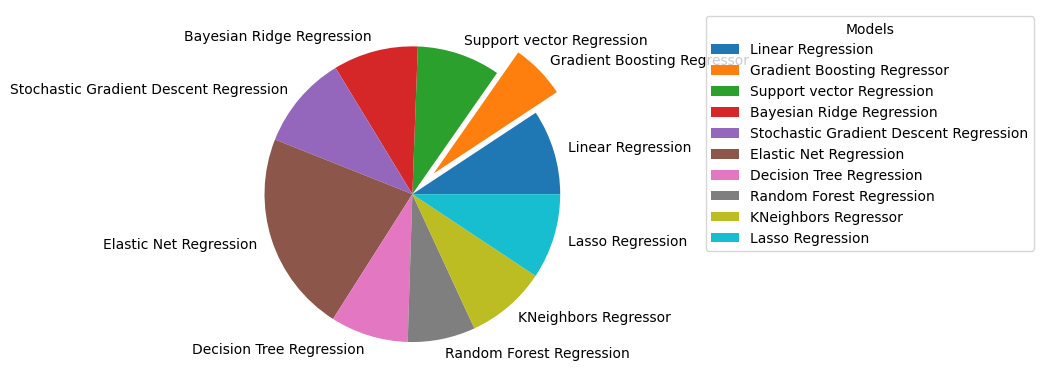

332.66093001815847


In [ ]:
R_square=[score1,score2,score3,score4,score5,score6,score7,score8,score9,score10]
MAE=[m1,m2,m3,m4,m5,m6,m7,m8,m9,m10]
no=[1,2,3,4,5,6,7,8,9,10]
Models=["Linear Regression","Gradient Boosting Regressor","Support vector Regression","Bayesian Ridge Regression","Stochastic Gradient Descent Regression","Elastic Net Regression","Decision Tree Regression","Random Forest Regression","KNeighbors Regressor","Lasso Regression"]
e=[0,0.2,0,0,0,0,0,0,0,0]
plt.pie(MAE,labels=Models,explode=e)
plt.legend(bbox_to_anchor= (2.2,1),title="Models")


plt.show()

print(min(MAE))

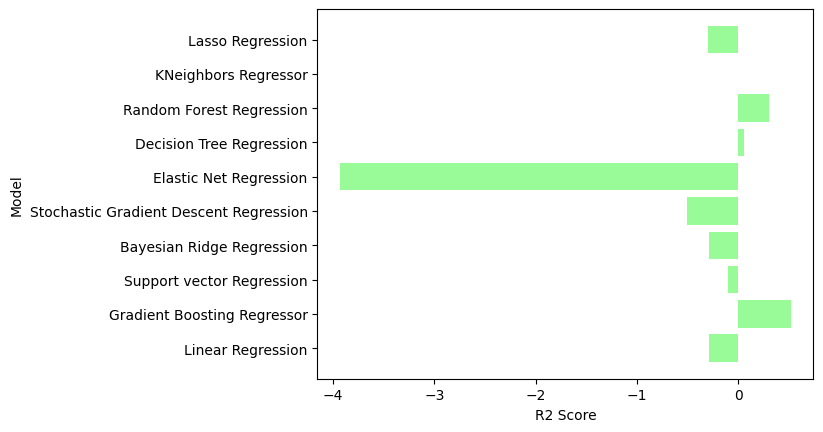

0.5193712158217516


In [ ]:

plt.barh(Models,R_square,color="PaleGreen")
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.show()

print(max(R_square))

# Hence from Visualization we get that Gradient Boosting Regressor has Maximun R2 score i.e. 51.9813 and Minimum Mean Absolute Error i.e. 332.6468191086806 
